### Command needed to run the code (if you have Anaconda)
conda install scikit-learn numpy pandas umap-learn matplotlib seaborn scipy

### Imports and reading the data

In [3]:
import sys
import sklearn
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE, Isomap, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score, recall_score
from sklearn.pipeline import Pipeline, make_pipeline
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set(color_codes = True)
state = 42 # Random state to use

In [ ]:
def magic_plot(x, y, alpha1 = 1, alpha2 = 0.5, title = ""):
    """
    Used to plot x with the corresponding labels y
    """
    plt.figure(figsize=(7, 7))
    colors = ['midnightblue', 'violet']
    lw = 1
    plt.scatter(x[y][:, 0], x[y][:, 1], color=colors[0], alpha= alpha1)
    plt.scatter(x[~y][:, 0], x[~y][:, 1], color=colors[1], alpha= alpha2)
    plt.title(title)
    plt.show()

In [32]:
data1 = pd.read_csv("1wwd.out", delimiter="\s+", engine='python', skiprows=5, header=None)
data1

,0,1,2,3,4,5,6,7,8
0,-0.61800,2.96522,2.32175,9.352,3.166,-6.255,-475.81,26.59,1.0
1,0.39055,3.02709,3.20019,8.684,3.688,-7.546,-465.81,26.36,1.0
2,3.82133,0.01488,2.50324,1.334,1.261,0.356,-460.23,1.99,1.0
3,4.24518,0.00296,2.06685,1.298,1.207,0.249,-459.71,1.83,1.0
4,4.11990,-0.01043,2.17843,1.381,1.161,0.189,-457.64,1.83,1.0
...,...,...,...,...,...,...,...,...,...
4387,3.29648,-0.11497,-0.42526,9.332,-9.476,-14.566,-159.96,45.37,1.0
4388,5.37648,0.44436,0.70397,1.417,-17.580,14.637,-158.99,21.38,1.0
4389,2.06952,2.85418,2.28387,-5.528,-29.526,12.384,-155.96,55.20,1.0
4390,0.05636,2.53516,3.50061,-3.448,-25.279,19.248,-155.11,42.02,1.0


### Conversion of coordinates

In [36]:
conv_data1 = data1.copy()

(4392, 9)


,0,1,2,3,4,5,6,7,8
0,-0.61800,2.96522,2.32175,9.352,3.166,-6.255,-475.81,26.59,1.0
1,0.39055,3.02709,3.20019,8.684,3.688,-7.546,-465.81,26.36,1.0
2,3.82133,0.01488,2.50324,1.334,1.261,0.356,-460.23,1.99,1.0
3,4.24518,0.00296,2.06685,1.298,1.207,0.249,-459.71,1.83,1.0
4,4.11990,-0.01043,2.17843,1.381,1.161,0.189,-457.64,1.83,1.0


In [44]:
x = np.array(data1.iloc[:,0])
y = np.array(data1.iloc[:,1])
z = np.array(data1.iloc[:,2])

ro = pd.Series(np.sqrt(x**2+y**2+z**2))
theta = pd.Series(np.arctan(y/x))
phi = pd.Series(np.arccos(z/(np.sqrt(x**2+y**2+z**2))))

conv_data1 = pd.concat([ro,theta,phi,data1.iloc[:,3:]], axis=1)
conv_data1.rename(columns={0:'Ro', 1:'Theta', 2:'Phi'}, inplace=True)
conv_data1.head()

,Ro,Theta,Phi,3,4,5,6,7,8
0,3.816409,-1.365321,0.916804,9.352,3.166,-6.255,-475.81,26.59,1.0
1,4.422332,1.442487,0.761730,8.684,3.688,-7.546,-465.81,26.36,1.0
2,4.568260,0.003894,0.990868,1.334,1.261,0.356,-460.23,1.99,1.0
3,4.721592,0.000697,1.117708,1.298,1.207,0.249,-459.71,1.83,1.0
4,4.660391,-0.002532,1.084409,1.381,1.161,0.189,-457.64,1.83,1.0


### Saving and analysing the dataset

In [45]:
conv_data1.to_csv('Data_Spherical_Coordinates.csv', index=False)

In [46]:
print(conv_data1.shape)
conv_data1.head()

(4392, 9)


,Ro,Theta,Phi,3,4,5,6,7,8
0,3.816409,-1.365321,0.916804,9.352,3.166,-6.255,-475.81,26.59,1.0
1,4.422332,1.442487,0.761730,8.684,3.688,-7.546,-465.81,26.36,1.0
2,4.568260,0.003894,0.990868,1.334,1.261,0.356,-460.23,1.99,1.0
3,4.721592,0.000697,1.117708,1.298,1.207,0.249,-459.71,1.83,1.0
4,4.660391,-0.002532,1.084409,1.381,1.161,0.189,-457.64,1.83,1.0


In [47]:
conv_data1.describe()

,Ro,Theta,Phi,3,4,5,6,7,8
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.0
mean,4.994133,0.487035,0.896764,3.540024,-1.949893,-1.361944,-278.205590,35.483147,1.0
std,1.674120,0.550993,0.387959,10.877112,10.382415,10.416100,52.377071,7.385024,0.0
min,0.169042,-1.570327,0.010131,-30.581000,-34.705000,-37.237000,-475.810000,1.440000,1.0
25%,3.714287,0.256966,0.606575,-4.200500,-9.384000,-9.520500,-309.535000,30.647500,1.0
50%,5.106587,0.449023,0.854530,4.129000,-0.959500,-2.043500,-270.995000,36.225000,1.0
75%,6.268459,0.794115,1.194242,9.970000,4.816250,7.166250,-240.060000,40.920000,1.0
max,9.678651,1.569948,2.874531,42.772000,35.831000,36.818000,-148.510000,56.900000,1.0


### Clustering (Kmeans and Spectral)

In [100]:
coord = conv_data1.iloc[:,0:3]
angles = coord.iloc[:,1:3]

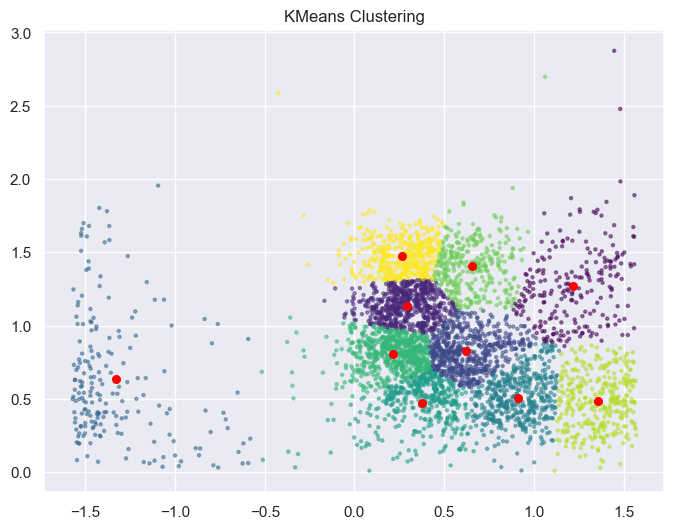

Cluster Centers:

[[ 1.21972155  1.2689947 ]
 [ 0.29100102  1.13668168]
 [ 0.62411771  0.82401711]
 [-1.32824504  0.63306756]
 [ 0.90890927  0.50943156]
 [ 0.37424201  0.47347474]
 [ 0.21732985  0.80800551]
 [ 0.65272006  1.40482196]
 [ 1.35664073  0.48464446]
 [ 0.26442341  1.47366069]]


In [130]:
kmeans = KMeans(n_clusters=10, n_init="auto", random_state=0)
km_clusters = kmeans.fit_predict(angles)
km_cluster_centers = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
plt.scatter(angles.iloc[:, 0], angles.iloc[:, 1], c=km_clusters, cmap='viridis', s=5, alpha=0.5)
plt.scatter(km_cluster_centers[:, 0], km_cluster_centers[:, 1], marker='o', c='red', s=30, label='Cluster centers')

plt.title('KMeans Clustering')

plt.grid(True)
plt.show()
print('Cluster Centers:')
print()
print(km_cluster_centers)

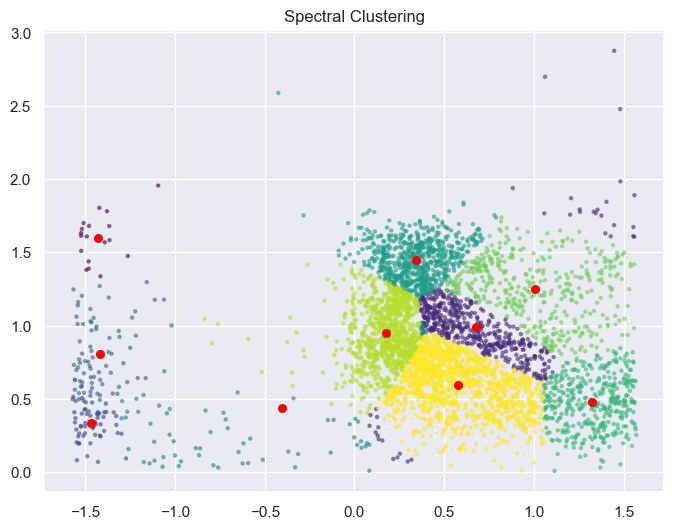

Cluster Centers:

[[-1.42877767  1.59961868]
 [ 0.67519479  0.99373183]
 [-1.46592092  0.33709218]
 [-1.4203952   0.81005058]
 [-0.40630738  0.43904999]
 [ 0.34512802  1.4509087 ]
 [ 1.32284499  0.47621369]
 [ 1.00711479  1.24883722]
 [ 0.17619862  0.95019624]
 [ 0.57613396  0.59642203]]


In [131]:
spectral = SpectralClustering(n_clusters=10, assign_labels='cluster_qr', random_state=state, n_neighbors=int(np.sqrt(angles.shape[0])))
s_clusters = spectral.fit_predict(angles)
plt.figure(figsize=(8, 6))
plt.scatter(angles.iloc[:, 0], angles.iloc[:, 1], c=s_clusters, cmap='viridis', s=5, alpha=0.5)

s_cluster_centers = np.zeros((10, 2))
for i in range(10): 
    s_cluster_points = angles[s_clusters == i]
    s_cluster_centers[i] = np.mean(s_cluster_points, axis=0)
plt.scatter(s_cluster_centers[:, 0], s_cluster_centers[:, 1], marker='o', c='red', s=30, label='Cluster centers')

plt.title('Spectral Clustering')

plt.grid(True)
plt.show()
print('Cluster Centers:')
print()
print(s_cluster_centers)